In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import scienceplots
%matplotlib inline

from nanonets.utils import load_boolean_results, fitness, abundance, nonlinear_parameter, return_ndr, return_nls
from scipy.optimize import curve_fit

data_folderA = "/home/jonasmensing/bagheera/data/1_funding_period/controls/posA/"
data_folderB = "/home/jonasmensing/bagheera/data/1_funding_period/controls/posB/"
GATES        = ["AND","OR","XOR","NAND","NOR","XNOR"]

/home/jonasmensing/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Parameter
N_valsA = [4,6,8,10,12,14,16]
N_keysA = len(N_valsA)
N_valsB = [4,6,8,10,12,14,16]
N_keysB = len(N_valsB)
N_np    = 9

# Boolean On and Off
off_statesA = np.array(N_keysA*[0.0])
off_statesB = np.array(N_keysB*[0.0])
on_statesA  = np.array(N_keysA*[0.01])
on_statesB  = np.array(N_keysB*[0.01])

dataA = load_boolean_results(folder=data_folderA, N=N_np, N_e=N_valsA, input_cols=['E0','E1'], on_state=0.01, max_error=0.1)
dataB = load_boolean_results(folder=data_folderB, N=N_np, N_e=N_valsB, input_cols=['E0','E1'], on_state=0.01, max_error=0.1)

## Fitness Abundance

In [3]:
delta       = 0.0
fitnessA    = {N : fitness(df=dataA[N], input_cols=['E0','E1'], delta=delta) for N in N_valsA}
abundanceA  = {N : abundance(df=fitnessA[N]) for N in N_valsA}

fitnessB    = {N : fitness(df=dataB[N], input_cols=['E0','E1'], delta=delta) for N in N_valsB}
abundanceB  = {N : abundance(df=fitnessB[N]) for N in N_valsB}

In [4]:
fitness_res = pd.DataFrame()

for j, N in enumerate(N_valsA): 

    df          = pd.melt(fitnessA[N].loc[:,'AND Fitness':], var_name='Gate', value_name='Fitness')
    df['$N_C$'] = N-3
    df['key']   = 'Distal Inputs'
    fitness_res = pd.concat([fitness_res, df], ignore_index=True)

for j, N in enumerate(N_valsB):
    
    df          = pd.melt(fitnessB[N].loc[:,'AND Fitness':], var_name='Gate', value_name='Fitness')
    df['$N_C$'] = N-3
    df['key']   = 'Proximal Inputs'
    fitness_res = pd.concat([fitness_res, df], ignore_index=True)
fitness_res.head(10)

,Gate,Fitness,$N_C$,key
0,AND Fitness,2.664298,1,Distal Inputs
1,AND Fitness,2.938001,1,Distal Inputs
2,AND Fitness,3.116369,1,Distal Inputs
3,AND Fitness,3.055517,1,Distal Inputs
4,AND Fitness,2.624334,1,Distal Inputs
5,AND Fitness,3.123653,1,Distal Inputs
6,AND Fitness,3.207302,1,Distal Inputs
7,AND Fitness,3.430940,1,Distal Inputs
8,AND Fitness,3.043139,1,Distal Inputs
9,AND Fitness,2.860265,1,Distal Inputs


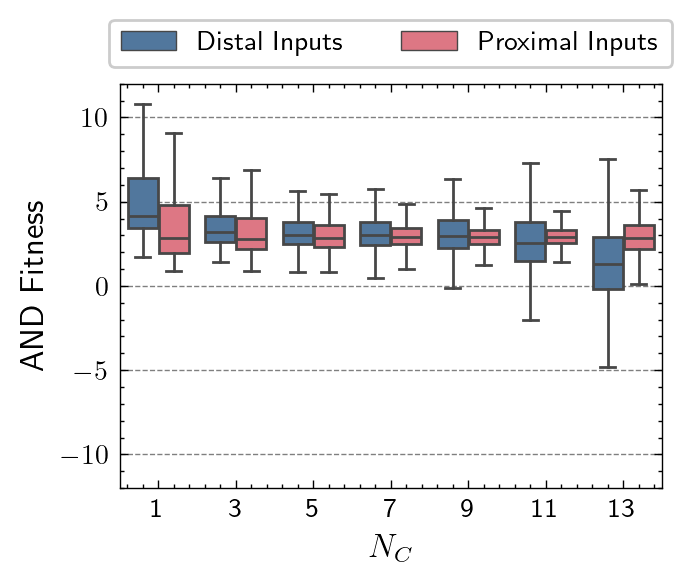

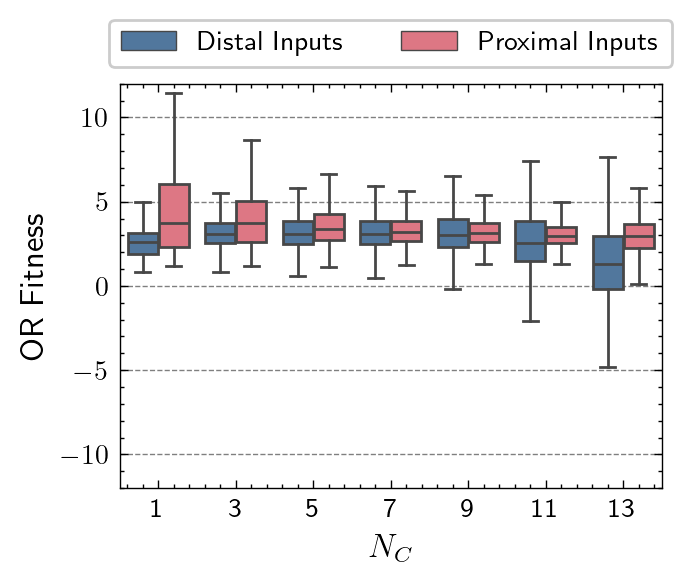

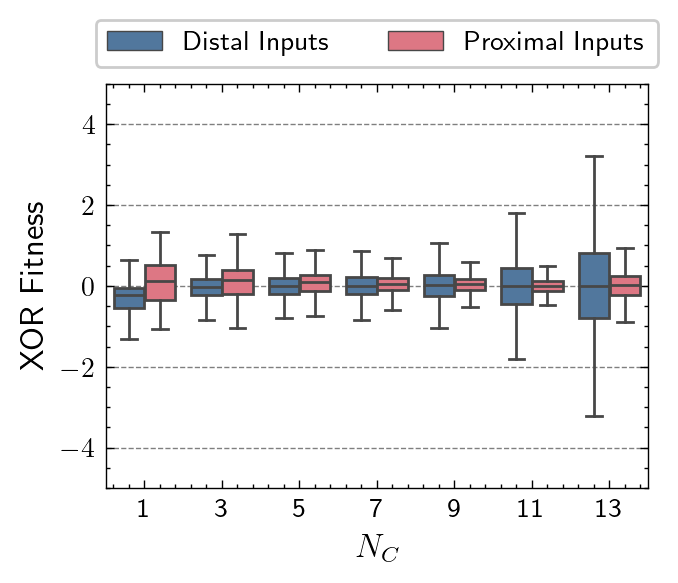

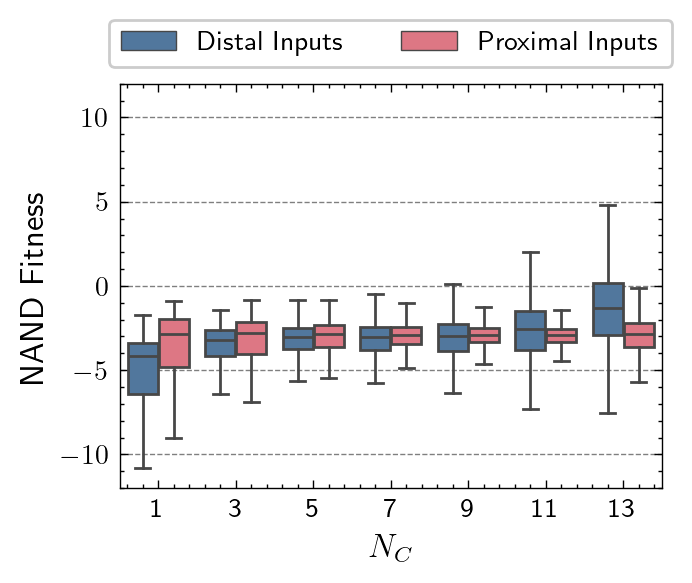

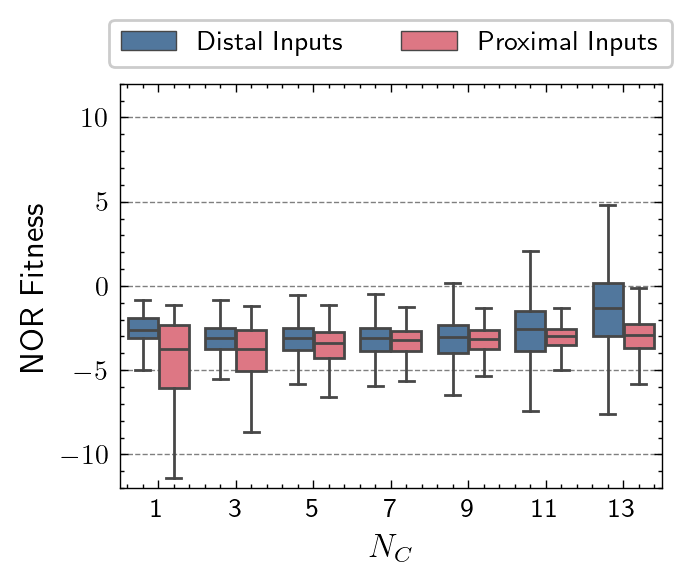

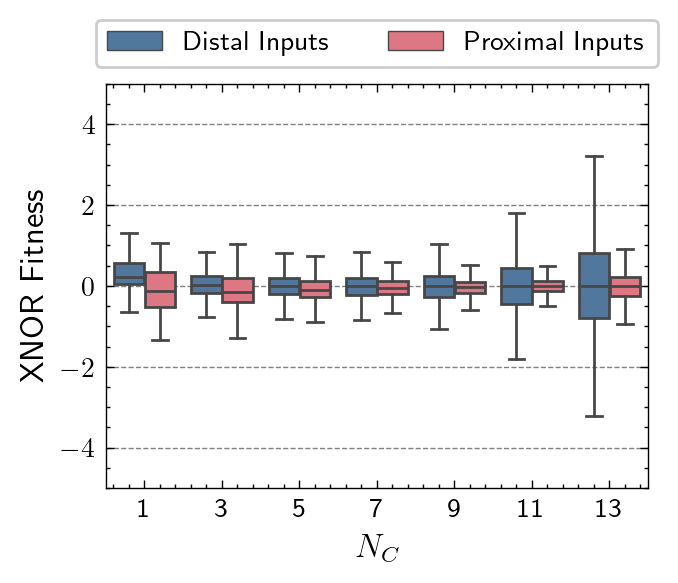

In [10]:
with plt.style.context(["science","bright", "grid"]):

    for gate in GATES:
        fig, ax = plt.subplots(dpi=200)
        # fig.set_figwidth(fig.get_figwidth()*2.2)
        # fig.set_figheight(fig.get_figheight()*0.8)
        ax = sns.boxplot(fitness_res[fitness_res['Gate']==f'{gate} Fitness'], x='$N_C$', y='Fitness', hue='key', fliersize=0, ax=ax)
        if gate[0] == 'X':
            ax.set_ylim(-5,5)
        else:
            ax.set_ylim(-12,12)
        ax.set_ylabel(f"{gate} Fitness", fontsize='large')
        ax.set_xlabel("$N_C$", fontsize='large')
        l = ax.legend(title='', bbox_to_anchor=(0.5,1.1), loc='center', ncol=2)
        # l.get_texts()[0].set_text('Distant Inputs')
        # l.get_texts()[1].set_text('Proximal Inputs')
        fig.savefig(f"plots/{gate}_box.svg", transparent=True)

In [21]:
# with plt.style.context(["science","bright", "grid"]):
    
#     fig = plt.figure(dpi=200, layout='constrained')
#     fig.set_figwidth(fig.get_figwidth()*2.2)
#     fig.set_figheight(fig.get_figheight()*0.8)

#     ax  = fig.add_subplot(1,3,1)
#     ax  = sns.boxplot(fitness_res[(fitness_res['Gate']=='AND Fitness') | (fitness_res['Gate']=='OR Fitness')], x='key', y='Fitness', hue='Gate', ax=ax, fliersize=0)
#     ax.set_ylim(-2,8)
#     ax.set_ylabel("Fitness")
#     ax.set_xlabel("")
#     l = ax.legend(title='', bbox_to_anchor=(0.5,1.1), loc='center', fontsize='small', ncol=2)
#     l.get_texts()[0].set_text('AND')
#     l.get_texts()[1].set_text('OR')

#     ax  = fig.add_subplot(1,3,2)
#     ax  = sns.boxplot(fitness_res[(fitness_res['Gate']=='NAND Fitness') | (fitness_res['Gate']=='NOR Fitness')], x='key', y='Fitness', hue='Gate', ax=ax, fliersize=0)
#     ax.set_ylim(-8,2)
#     ax.set_ylabel("")
#     ax.set_xlabel("")
#     l = ax.legend(title='', bbox_to_anchor=(0.5,1.1), loc='center', fontsize='small', ncol=2)
#     l.get_texts()[0].set_text('NAND')
#     l.get_texts()[1].set_text('NOR')

#     ax  = fig.add_subplot(1,3,3)
#     ax  = sns.boxplot(fitness_res[(fitness_res['Gate']=='XOR Fitness') | (fitness_res['Gate']=='XNOR Fitness')], x='key', y='Fitness', hue='Gate', ax=ax, fliersize=0)
#     ax.set_ylim(-2,2)
#     ax.set_ylabel("")
#     ax.set_xlabel("")
#     l = ax.legend(title='', bbox_to_anchor=(0.5,1.1), loc='center', fontsize='small', ncol=2)
#     l.get_texts()[0].set_text('XOR')
#     l.get_texts()[1].set_text('XNOR')

# fig.savefig("plots/box_plots.svg", transparent=True)

## Nonlinear Parameter

In [26]:
# x_vals  = [f"A{i-3}" for i in N_valsA] + [f"B{i-3}" for i in N_valsB[::-1]]

# Current Relations
n_bootstrap = 100
paramsA = {N : nonlinear_parameter(dataA[N], input1_column='E0', input2_column='E1', n_bootstrap=n_bootstrap) for i, N in enumerate(N_valsA)}
paramsB = {N : nonlinear_parameter(dataB[N], input1_column='E0', input2_column='E1', n_bootstrap=n_bootstrap) for i, N in enumerate(N_valsB)}

# NDR
Q_ndrA   = []
Q_ndrB   = []
Q_nlsA   = []
Q_nlsB   = []
for i in range(n_bootstrap):
    Q_ndr_l = np.array([return_ndr(paramsA[N][i]['Ml']) for N in N_valsA])
    Q_ndr_r = np.array([return_ndr(paramsA[N][i]['Mr']) for N in N_valsA])
    Q_ndrA.append((Q_ndr_l + Q_ndr_r) / 2)

    # NDR
    Q_ndr_l = np.array([return_ndr(paramsB[N][i]['Ml']) for N in N_valsB])
    Q_ndr_r = np.array([return_ndr(paramsB[N][i]['Mr']) for N in N_valsB])
    Q_ndrB.append((Q_ndr_l + Q_ndr_r) / 2)
    # Q_ndr   = np.append(Q_ndrA, Q_ndrB)

    # NLS
    bins    = 100
    Q_nlsA.append(np.array([return_nls(df=paramsA[N][i], bins=bins) for N in N_valsA]))
    Q_nlsB.append(np.array([return_nls(df=paramsB[N][i], bins=bins) for N in N_valsB]))
    # Q_nls   = np.append(Q_nlsA, Q_nlsB)

In [28]:
np.mean(Q_ndrA,axis=0)

array([0.00815459, 0.00831926, 0.01755638, 0.02555844, 0.05256273,
       0.14945232, 0.34775719])

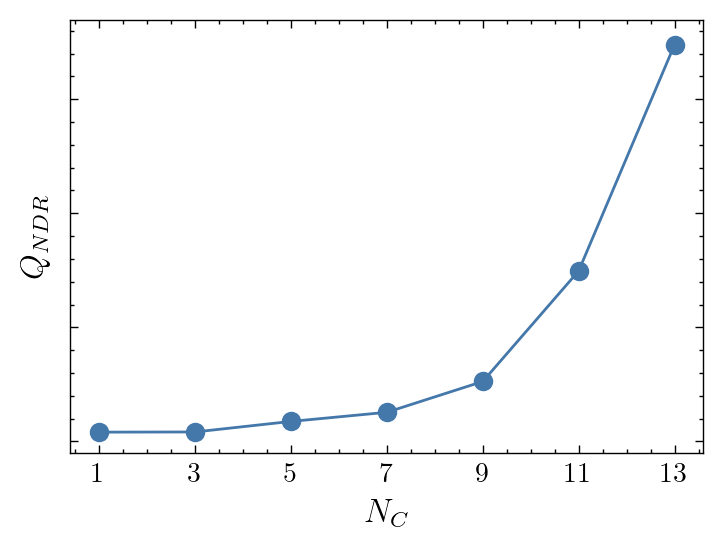

In [ ]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    # fig.set_figwidth(fig.get_figwidth()*1.5)
    # fig.set_figheight(fig.get_figheight()*0.8)
    ax  = fig.add_subplot()
    p = ax.errorbar(np.array(N_valsA)-3, np.mean(Q_ndrA,axis=0), 1.96*np.std(Q_ndrA,axis=0), marker='o', capsize=2)
    # ax.plot(np.array(N_valsB)-3, Q_ndrB, '-s', label='Proximal Inputs, NDR', color=p[0].get_color())
    # ax.set_ylim(0.0,0.5)

    # ax.plot(np.array(N_valsB)-3, Q_nlsB, '-s', label='Proximal Inputs, NLS', color=p[0].get_color())

    # ax.legend(loc='upper left', fontsize='small')
    ax.set_ylabel("$Q_{NDR}$", fontsize='large')
    ax.set_xlabel("$N_C$", fontsize='large')
    ax.set_xticks(np.array(N_valsB)-3)
    ax.set_yticklabels("")
    ax.grid(False)

    # ax.set_ylim(0.005,0.5)
    # ax.set_yscale('log')

fig.savefig("plots/nonlinear_params.svg", transparent=True)

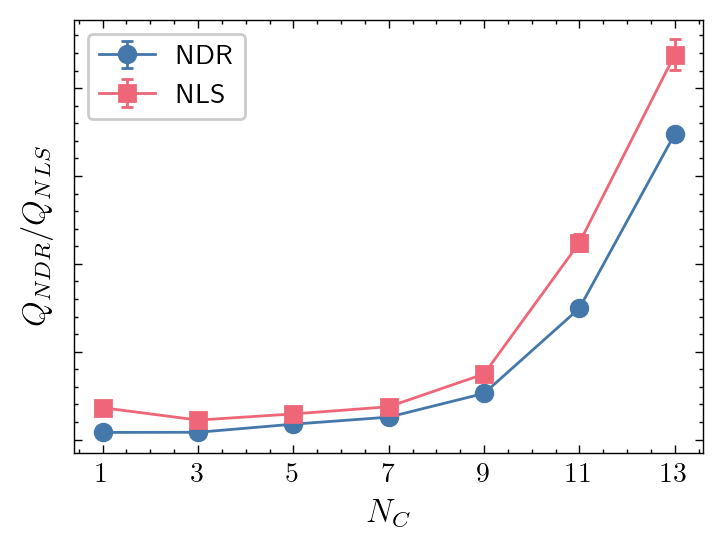

In [43]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    # fig.set_figwidth(fig.get_figwidth()*1.5)
    # fig.set_figheight(fig.get_figheight()*0.8)
    ax  = fig.add_subplot()
    # ax.plot(np.array(N_valsB)-3, Q_ndrB, '-s', label='Proximal Inputs, NDR', color=p[0].get_color())
    # ax.set_ylim(0.0,0.5)
    p = ax.errorbar(np.array(N_valsA)-3, np.mean(Q_ndrA,axis=0), 1.96*np.std(Q_ndrA,axis=0), marker='o', capsize=2, label='NDR')
    p = ax.errorbar(np.array(N_valsA)-3, np.mean(Q_nlsA,axis=0), 1.96*np.std(Q_nlsA,axis=0), marker='s', capsize=2, label='NLS')
    # ax.plot(np.array(N_valsB)-3, Q_nlsB, '-s', label='Proximal Inputs, NLS', color=p[0].get_color())

    ax.legend(loc='upper left')
    ax.set_ylabel("$Q_{NDR}/Q_{NLS}$", fontsize='large')
    ax.set_xlabel("$N_C$", fontsize='large')
    ax.set_xticks(np.array(N_valsB)-3)
    ax.set_yticklabels("")
    ax.grid(False)
    # ax.set_ylim(0.005,0.5)
    # ax.set_yscale('log')

fig.savefig("plots/nonlinear_params.svg", transparent=True)

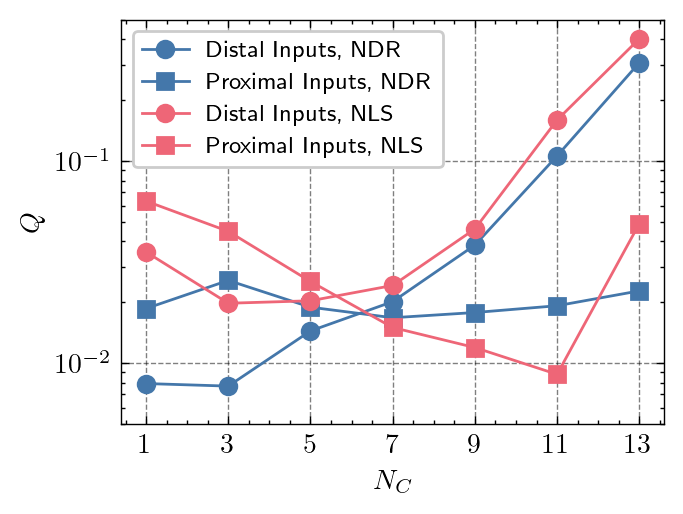

In [ ]:
# with plt.style.context(["science","bright","grid"]):

#     fig = plt.figure(dpi=200)
#     # fig.set_figwidth(fig.get_figwidth()*1.5)
#     # fig.set_figheight(fig.get_figheight()*0.8)
#     ax  = fig.add_subplot()
#     p = ax.plot(np.array(N_valsA)-3, Q_ndrA, '-o', label='Distal Inputs, NDR')
#     ax.plot(np.array(N_valsB)-3, Q_ndrB, '-s', label='Proximal Inputs, NDR', color=p[0].get_color())
#     ax.set_ylim(0.0,0.5)

#     p = ax.plot(np.array(N_valsA)-3, Q_nlsA, '-o', label='Distal Inputs, NLS')
#     ax.plot(np.array(N_valsB)-3, Q_nlsB, '-s', label='Proximal Inputs, NLS', color=p[0].get_color())

#     ax.legend(loc='upper left', fontsize='small')
#     ax.set_ylabel("$Q$")
#     ax.set_xlabel("$N_C$")
#     ax.set_xticks(np.array(N_valsB)-3)

#     ax.set_ylim(0.005,0.5)
#     ax.set_yscale('log')

fig.savefig("plots/nonlinear_params_log.svg", transparent=True)

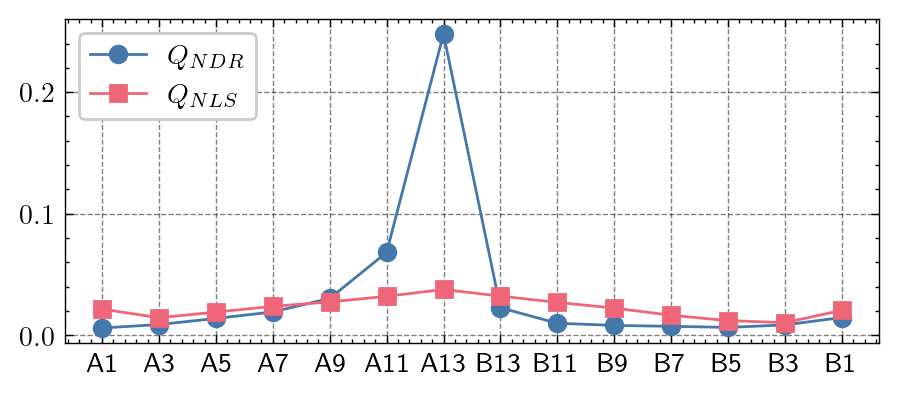

In [ ]:
# with plt.style.context(["science","bright","grid"]):

#     fig = plt.figure(dpi=200)
#     fig.set_figwidth(fig.get_figwidth()*1.5)
#     fig.set_figheight(fig.get_figheight()*0.8)
#     ax  = fig.add_subplot()
#     ax.plot(x_vals, Q_ndr, '-o', label='$Q_{NDR}$')
#     ax.plot(x_vals, Q_nls, '-s', label='$Q_{NLS}$')
#     ax.legend(loc='upper left')
# fig.savefig("plots/nonlinear_params.svg", transparent=True)

---

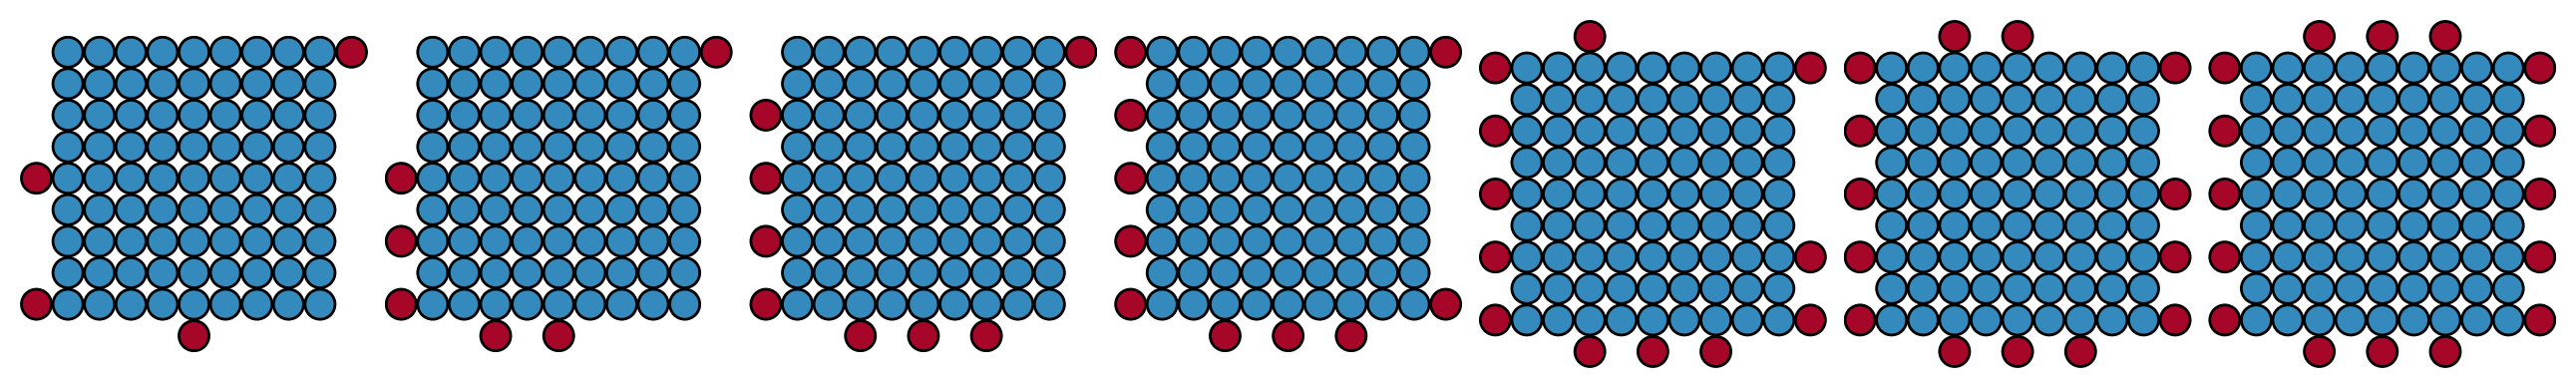

In [15]:
from nanonets import Simulation
from nanonets.utils import display_network

N_PARTICLES = 9
N_CONTROLS  = [1,3,5,7,9,11,13]

fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)

for i, N_c in enumerate(N_CONTROLS):
    ax   = fig.add_subplot(1,7,i+1)
    topo = {"Nx":N_PARTICLES,"Ny":N_PARTICLES}
    pos  = [[4,0],[0,4]]
    if N_c >= 1:
        pos.append([0,0])
    if N_c >= 3:
        pos.append([2,0])    
        pos.append([0,2])
    if N_c >= 5:
        pos.append([6,0])    
        pos.append([0,6])    
    if N_c >= 7:
        pos.append([8,0])    
        pos.append([0,8])    
    if N_c >= 9:
        pos.append([8,2])    
        pos.append([2,8])    
    if N_c >= 11:
        pos.append([8,4])    
        pos.append([4,8])
    if N_c >= 13:    
        pos.append([8,6])    
        pos.append([6,8])
    pos.append([8,8])
    N_e = len(pos)
    topo["e_pos"] = pos
    topo["electrode_type"] = N_e*['constant']
    sim_class = Simulation(topo, pack_optimizer=False)
    fig, ax = display_network(sim_class.get_graph(), sim_class.get_positions(), sim_class.get_radius(), fig, ax)
    ax.axis('off')
fig.savefig(f"plots/network_plots_pos_A.svg", transparent=True)

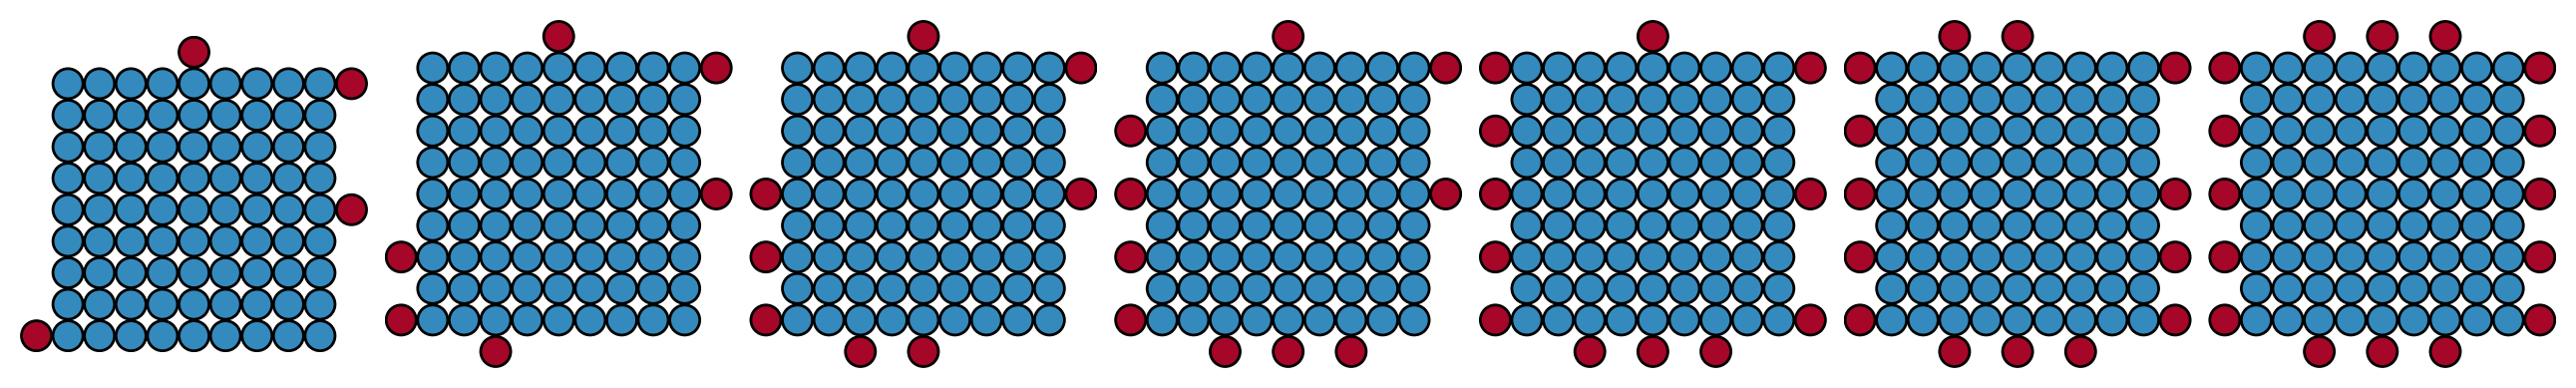

In [16]:
from nanonets import Simulation
from nanonets.utils import display_network

N_PARTICLES = 9
N_CONTROLS  = [1,3,5,7,9,11,13]

fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)

for i, N_c in enumerate(N_CONTROLS):
    ax   = fig.add_subplot(1,7,i+1)
    topo = {"Nx":N_PARTICLES,"Ny":N_PARTICLES}
    pos  = [[8,4],[4,8]]
    if N_c >= 1:
        pos.append([0,0])
    if N_c >= 3:
        pos.append([2,0])    
        pos.append([0,2])
    if N_c >= 5:
        pos.append([4,0])    
        pos.append([0,4])
    if N_c >= 7:
        pos.append([6,0])    
        pos.append([0,6])    
    if N_c >= 9:
        pos.append([8,0])    
        pos.append([0,8])    
    if N_c >= 11:
        pos.append([8,2])    
        pos.append([2,8])    
    if N_c >= 13:    
        pos.append([8,6])    
        pos.append([6,8])
    pos.append([8,8])
    N_e = len(pos)
    topo["e_pos"] = pos
    topo["electrode_type"] = N_e*['constant']
    sim_class = Simulation(topo, pack_optimizer=False)
    fig, ax = display_network(sim_class.get_graph(), sim_class.get_positions(), sim_class.get_radius(), fig, ax)
    ax.axis('off')
fig.savefig(f"plots/network_plots_pos_B.svg", transparent=True)

## Relative Error

In [8]:
# max_jumps_portionA   = [100*((dataA[N]['Jumps']==1e7).sum() / len(dataA[N])) for N in N_valsA]
# rel_error_distA      = [100*np.abs(dataA[N]['Error'].values / dataA[N]['Observable'].values) for N in N_valsA]

# max_jumps_portionB   = [100*((dataB[N]['Jumps']==1e7).sum() / len(dataB[N])) for N in N_valsB]
# rel_error_distB      = [100*np.abs(dataB[N]['Error'].values / dataB[N]['Observable'].values) for N in N_valsB]

In [9]:
# def lin_func(x, a, b):
#     return a*x + b
# def log_func(x, a, b):
#     return a * np.log(x) + b

# with plt.style.context(["science","bright","grid"]):

#     cmap    = plt.get_cmap('Reds')
#     fig     = plt.figure(dpi=200, layout='constrained')
#     ax1     = fig.add_subplot(1,2,1)
#     ax2     = fig.add_subplot(1,2,2)
#     fig.set_figwidth(fig.get_figwidth()*1.5)
#     fig.set_figheight(fig.get_figheight()*0.8)

#     for i, arr in enumerate(rel_error_distA[::-1]):
#         arr1            = arr.copy()
#         arr1[arr1 > 10] = 10
#         ax1             = sns.kdeplot(arr1, ax=ax1, color=cmap((len(rel_error_distA)-i)/len(rel_error_distA)), 
#                                       fill=True, alpha=0.1, log_scale=True)

#     ax1.set_xlim(5,12)
#     ax1.set_xlabel('$u_I / I$ [\%]')

#     x       = np.array(N_valsA)
#     y       = max_jumps_portion
#     p, _    = curve_fit(lin_func, x, y)
#     ax2.plot(x, y, 'o')
#     ax2.plot(x, lin_func(x,*p), '-')
#     ax2.set_xlabel('$N_{NP}$')
#     ax2.set_ylabel('$P[N_{j} > N_{j,max}]$ [\%]')
#     # ax2.set_xlim(0,270)

#     # fig.savefig("../plots/data_quality_vs_system_size.svg", transparent=True, bbox_inches='tight')
#     # fig.savefig("../plots/data_quality_vs_system_size.pdf", transparent=False, bbox_inches='tight')